# Welcome to the Hate Speech Detection Seminar WS23/24

Dr. Özge Alaçam \
Email: oezge.alacam@lmu.de

Today's Agenda

- Setting up the environment (Google Colab)
- Reading files
- Conducting Interrater Agreement
- Online Annotation tools

### Set-up your environments

There are many options to run the Jupyter notebooks, here are some more straightforward solutions:

* (mini) conda in your local computer (https://docs.anaconda.com/free/miniconda/miniconda-install/)
* Google Colab (it might have problems to run some jupyterlab widgets)
* **Visual Studio** in your local computer (https://code.visualstudio.com/download)

## Installing Conda
The practices will be conducted using <span style="color:blue">Python 3</span>.
We will rely on <span style="color:blue">Anaconda</span> (https://www.anaconda.com/download), which include most of the NLP and machine learning components. It also includes <span style="color:blue">Anaconda Navigator</span>, which is desktop graphical user interface that allows to launch different applications (Jupytor notebook, Spider GUI, GraphViz...) easily.

From the link above, choose the version with respect to your operating system.

For most of the practice classes, we will use the <span style="color:blue">Jupyter Notebook</span> web application to run and demonstrate examples. Except in the case of developing complex assignments and projects, you will also use <span style="color:blue">Jupyter notebook</span> to submit your assignments and in-class exercises.

### How to open Jupyter Notebook:
####  Using Anaconda Navigation 

To open <span style="color:blue">Jupyter Notebook</span> using Anaconda navigator:

Once Anaconda is installed, open <span style="color:blue">Anaconda Navigator</span> from your program/application lists for <span style="color:blue">MacOS</span> and <span style="color:blue">Windows</span>.

For Linux, open a terminal and type `anaconda-navigator`

Then you can choose either <span style="color:blue">JupyterLab</span> or <span style="color:blue">Jupyter Notebook</span> to open Jupyter notebook. You can also open it via Spyder but you need to install a notebook plugin

####  Open Juypter using command line
From the command line, type:
> `jupyter notebook`

This will open the Jupyter Notebook in the browser.

## Google Colab
Google provides a free cloud service based on Jupyter Notebooks that supports free GPU, allows developing deep learning applications using PyTorch, TensorFlow, Keras, and so on.

You can share your Jupyter notebooks, mount your Google Drive, ...

If you already have the "Colab Notebooks" folder in your Drive, upload the unzipped "HateSpeechLecture" folder to "Colab Notebooks".

### Creating a folder for your notebooks
If you do not have the "Colab Notebooks" folder in your Drive, you can create it in the following way: \
Create a new "collaboratory notebook": "New -> Colaboratory" \
Save a copy of the notebook in your Drive. \
Google-Drive will automatically create the folder.

Optionally you can leave your practice class folder in another place in your Drive that you wish. But then you need to change the "paths" of the notebook so that it can access the data.


Or you can directly go to Colab: https://colab.research.google.com/

From there you can name your notebook and setup your environment, such as selecting a GPU

### Mounting your Google Drive
Mounting your Google Drive allows you to store models, files and logs on your Google Drive folder.

Once you set up Colab, you can run the following code to mount it to your google drive.

```python
from google.colab import drive
drive.mount('/content/gdrive')
```

It will generate a link, click the link, copy the code and paste it in the text box, press Enter and your drive will be mounted.

To see the contents in your Google Drive

```python
!ls "/content/gdrive/My Drive/"
```

### Install some necessary packages for this session

In [10]:
!pip install openpyxl
!pip install krippendorff
!pip install pigeon-jupyter
!pip install pigeonXT-jupyter
!pip install tortus
!pip install matplotlib
!pip install -U scikit-learn
## you might need to install some more if your environments does not have them

  Using cached scikit_learn-1.4.1.post1-cp39-cp39-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached scipy-1.12.0-cp39-cp39-macosx_12_0_arm64.whl.metadata (60 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.3.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.4.1.post1-cp39-cp39-macosx_12_0_arm64.whl (10.5 MB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached scipy-1.12.0-cp39-cp39-macosx_12_0_arm64.whl (31.4 MB)
Using cached threadpoolctl-3.3.0-py3-none-any.whl (17 kB)


# Interrater Agreement Analysis

In [11]:
## importing necessary libraries
import numpy as np
import pandas as pd

## The Matplotlib Library underpins the Visualizations we are about to
## demonstrate.
import matplotlib.pyplot as plt
#
## The scikit-learn Library (aka sklearn) provides simple and efficient
## tools for predictive data analysis.
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [13]:
## Lets say that we have collected data (binary) from two raters 
rater1 = ['yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes']
rater2 = ['yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes']

In [12]:
## simple approach for two annotators on the identical items is Cohen's kappa
cohen_kappa_score(rater1, rater2)

0.3571428571428572

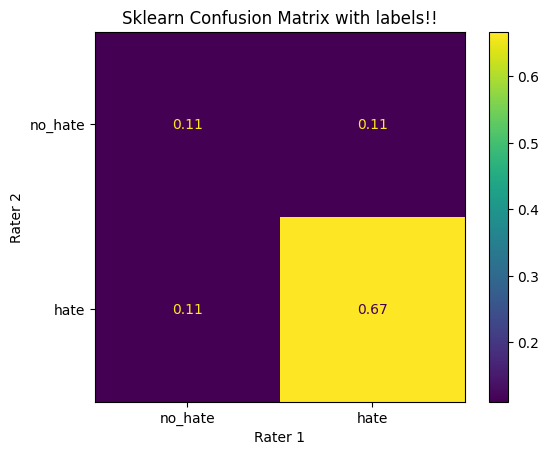

In [14]:
## Create the Confusion Matrix out of the Actual and Predicted Data.
cm =confusion_matrix(rater1, rater2,normalize='all')
### cm =confusion_matrix(rater1, rater2)


## Create the Confusion Matrix Display Object(cmd). Note the
## alphabetical sorting order of the labels.
cmd = ConfusionMatrixDisplay(cm, display_labels=['no_hate','hate'])

## The plot() function has to be called for the sklearn visualization
cmd.plot()

## Use the Axes attribute 'ax_' to get to the underlying Axes object.
## The Axes object controls the labels for the X and the Y axes. It
## also controls the title.
cmd.ax_.set(title='Sklearn Confusion Matrix with labels!!',
                xlabel='Rater 1',
                ylabel='Rater 2')

## Finally, call the matplotlib show() function to display the visualization
## of the Confusion Matrix.
plt.show()

___________________________________________________
### Lets apply this to a real data taken from Davidson Twitter dataset

In [21]:
## this is the simplified and short version, you can play with the original data using the davidson_labeled_data.csv
df = pd.read_excel('sample_interrater_agreement_davidson.xlsx', 'Sheet1') 
print(df)

    Unnamed: 0  R1  R2                                              tweet
0          122   0   0  "@Ferocious_Ghost: @1stName_Bravo Aw." ...fag,...
1          123   1   1  "@FloKid88: As long as the Lakers trash from n...
2          124   1   1  "@Frosstyy_: @h0rheyd I didn't say anything th...
3          125   1   1  "@FunnyPicsDepot: this the "I play soccer, che...
4          126   1   1  "@G27Status: I could go for a fat ass bitch on...
5          127   0   1           "@GEDMelle: 17 missed calls!!!! &#128544
6          128   1   1  "@GTM_Al: Ya side bitch gotta know it's rules ...
7          130   1   1  "@GirlThatsVonte: These hoes be thinking Meat ...
8          131   1   1  "@GirlThatsVonte: Yall bitches wit no edges be...
9          133   1   1  "@Girllssues: I wanna have sex with my mom fuc...
10         134   1   1  "@Gizzy_Jones94: If she kiss u with her eyes o...
11         135   1   1  "@Goofstroop: You a woulda coulda shoulda ass ...
12         137   1   1  "@HBMostDope: 

In [22]:
### converting data frame columns to numpy array
R1= df["R1"].to_numpy()
R2= df["R2"].to_numpy()


In [23]:
print('R1: ', R1)
print('R2: ', R2)

R1:  [0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0]
R2:  [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0
 1 0 1 0]


In [24]:
confusion_matrix(R1, R2)

array([[ 2,  1],
       [ 5, 33]])

## Krippendorff Kappa
* It is suitable for Multi-label annotations
* it supports categorical, ordinal, interval and ratio type  
* multi-rater annotation
 
 ### Please try to understand the difference between the following two data entry methods that yield the same result! 

In [25]:
import krippendorff
import numpy as np


print("Example from https://en.wikipedia.org/wiki/Krippendorff's_Alpha")
print()

### DATA FORMAT #1:
reliability_data_str = (
    "*    *    *    *    *    3    4    1    2    1    1    3    3    *    3",  # coder A
    "1    *    2    1    3    3    4    3    *    *    *    *    *    *    *",  # coder B
    "*    *    2    1    3    4    4    *    2    1    1    3    3    *    4",  # coder C
)
print("\n".join(reliability_data_str))
print()

reliability_data = [[np.nan if v == "*" else int(v) for v in coder.split()] for coder in reliability_data_str]

print("Krippendorff's alpha for nominal metric: ", krippendorff.alpha(reliability_data=reliability_data,
                                                                        level_of_measurement="nominal"))
print("Krippendorff's alpha for interval metric: ", krippendorff.alpha(reliability_data=reliability_data))





Example from https://en.wikipedia.org/wiki/Krippendorff's_Alpha

*    *    *    *    *    3    4    1    2    1    1    3    3    *    3
1    *    2    1    3    3    4    3    *    *    *    *    *    *    *
*    *    2    1    3    4    4    *    2    1    1    3    3    *    4

Krippendorff's alpha for nominal metric:  0.691358024691358
Krippendorff's alpha for interval metric:  0.8108448928121059


In [26]:
### DATA FORMAT #2:

print("From value counts:")
print()
value_counts = np.array([[1, 0, 0, 0],
                            [0, 0, 0, 0],
                            [0, 2, 0, 0],
                            [2, 0, 0, 0],
                            [0, 0, 2, 0],
                            [0, 0, 2, 1],
                            [0, 0, 0, 3],
                            [1, 0, 1, 0],
                            [0, 2, 0, 0],
                            [2, 0, 0, 0],
                            [2, 0, 0, 0],
                            [0, 0, 2, 0],
                            [0, 0, 2, 0],
                            [0, 0, 0, 0],
                            [0, 0, 1, 1]])
print(value_counts)
print("Krippendorff's alpha for nominal metric: ", krippendorff.alpha(value_counts=value_counts,
                                                                        level_of_measurement="nominal"))
print("Krippendorff's alpha for interval metric: ", krippendorff.alpha(value_counts=value_counts))

From value counts:

[[1 0 0 0]
 [0 0 0 0]
 [0 2 0 0]
 [2 0 0 0]
 [0 0 2 0]
 [0 0 2 1]
 [0 0 0 3]
 [1 0 1 0]
 [0 2 0 0]
 [2 0 0 0]
 [2 0 0 0]
 [0 0 2 0]
 [0 0 2 0]
 [0 0 0 0]
 [0 0 1 1]]
Krippendorff's alpha for nominal metric:  0.691358024691358
Krippendorff's alpha for interval metric:  0.8108448928121059


# Annotation Libraries that make the life easier!

# PIGEONXT

PigeonXT is a simple widget that lets you quickly annotate a dataset of unlabeled examples from the comfort of your Jupyter notebook.

Source code: https://github.com/dennisbakhuis/pigeonXT

PigeonXT supports the following annotation tasks:

* binary / multi-class classification
* multi-label classification
* regression tasks
* captioning tasks

Anything that can be displayed on Jupyter (text, images, audio, graphs, etc.) can be displayed by pigeon by providing the appropriate display_fn argument

In [1]:
#from pigeon import annotate
from pigeonXT import annotate
from IPython.display import display, Image


## Binary or multi-class text classification

In [7]:
annotations = annotate(
  ['I love this movie', 'I was really disappointed by the book'],
  options=['positive', 'negative', 'inbetween']
)

HTML(value='0 of 2 Examples annotated, Current Position: 0 ')

Output()

Annotation done.


In [8]:
annotations

,example,changed,label
0,I love this movie,True,positive
1,I was really disappointed by the book,True,negative


## TORTUS

https://github.com/SiphuLangeni/tortus

In [77]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [78]:
df = df.rename(columns={'tweet': 'text'})
df.head()

,Unnamed: 0,R1,R2,text
0,122,0,0,"""@Ferocious_Ghost: @1stName_Bravo Aw."" ...fag,..."
1,123,1,1,"""@FloKid88: As long as the Lakers trash from n..."
2,124,1,1,"""@Frosstyy_: @h0rheyd I didn't say anything th..."
3,125,1,1,"""@FunnyPicsDepot: this the ""I play soccer, che..."
4,126,1,1,"""@G27Status: I could go for a fat ass bitch on..."


In [82]:
## https://github.com/SiphuLangeni/tortus
#!pip install tortus
from tortus import Tortus
tortus = Tortus(df, 'text', num_records=5, id_column=None, annotations=None, random=True, labels=['Offensive', 'Hate', 'Neutral'])

tortus.annotate()

HTML(value='Click on the label corresponding with the text below. Each selection requires                 conf…

HTML(value='<h4>"@HiImJoriB: I would wife a hoe only cuz we wouldn\'t care that we cheating in each other." ..…

GridBox(children=(VBox(children=(Box(children=(Button(description='Offensive', layout=Layout(border_bottom='so…

Output()

In [83]:
annotations = tortus.annotations

In [84]:
annotations

,id_column,text,label,annotated_at


In [42]:
annotations.to_csv('my_annotations.csv', sep='\t', encoding='utf-8')

# Annotating image file

In [90]:
#from pigeonXT import annotate
from pigeon import annotate
from IPython.display import display, Image

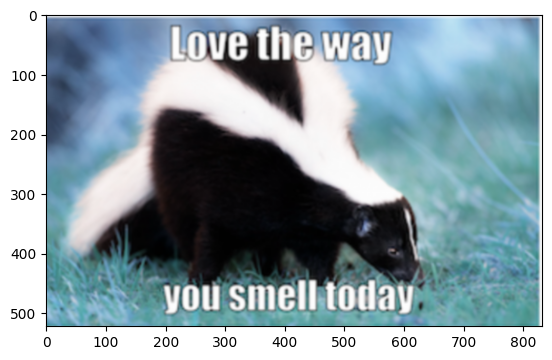

In [91]:
import cv2
import matplotlib.pyplot as plt

## a way to get image read from url
# !wget "https://cdn.pixabay.com/photo/2021/02/12/02/01/rosebud-6006985_1280.jpg"

img = filepath+'meme1.png'
img = cv2.imread(img) # reads image
plt.imshow(img)

In [93]:
annotations = annotate(
  ['meme1.png', 'meme2.png', 'meme3.png','meme4.png'],
  options=['offensive', 'hate', 'neutral'],
  display_fn=lambda filename: display(Image(filename))
)

HTML(value='0 examples annotated, 5 examples left')

Output()

In [73]:
annotations

[('meme1.png', 'offensive'),
 ('meme2.png', 'hate'),
 ('meme3.png', 'hate'),
 ('meme4.png', 'neutral')]

In [95]:
davidson_data = pd.read_csv('labeled_data.csv')
davidson_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
davidson_data = davidson_data.rename(columns={'tweet': 'text'})
davidson_data.head()

In [ ]:
### Write the file to csv file for later use!
annotations.to_csv(annotations, sep='\t', encoding='utf-8')